# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## Load Dataset
- MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


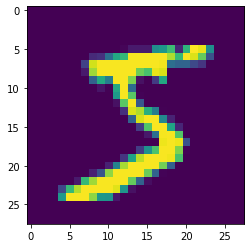

Label:  5


In [5]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

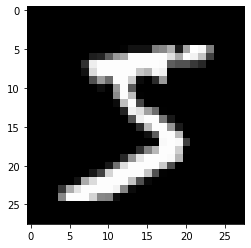

In [6]:
a= X_train[0]
print(a)
plt.imshow(a, cmap ="gray")

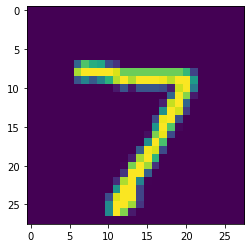

Label:  7


In [7]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [8]:
# reshaping X data: (n, 28, 28) => (n, 784) -1 : 28*28, 2차원을 1차원으로 줄인것!
# shape[0]은? shape의 개수
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [9]:
print(X_train.shape[0])

60000


In [10]:
a = np.array([[1,2], [3,4], [5,6]])
print(a)
a = a.reshape(2,3)
print(a)
a = a.reshape(3, -1)
print(a)

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [11]:
# use only 33% of training data to expedite the training process
# 튜플은 언패킹이 가능하다.
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [12]:
# mean ,variance = getdata(7,3)
#a = (7,3) #튜플로 언패킹하는게 낫다.
#c[0]
#c[1] 

In [13]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [15]:
model = Sequential()

In [16]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

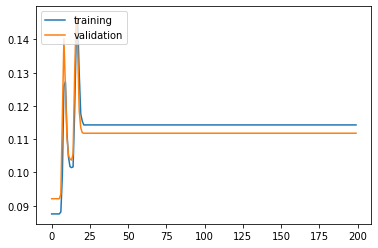

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [56]:
results = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1135


## 1. Weight Initialization



- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [21]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

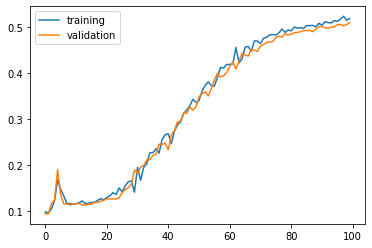

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [24]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [25]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5090000033378601


## 2. Nonlinearity (Activation function)

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

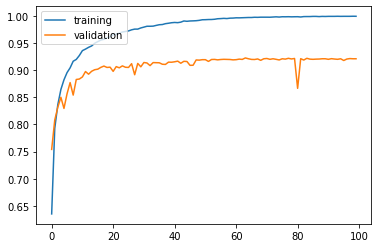

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [29]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9193000197410583


## 3. Optimizers


In [31]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [32]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

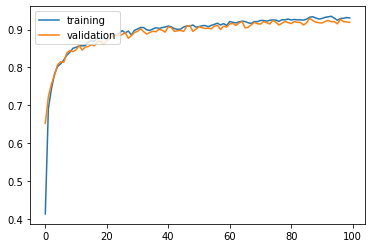

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [34]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 22us/step


In [35]:
print('Test accuracy: ', results[1])

Test accuracy:  0.917900025844574


## 4. Batch Normalization

비선형 변환 전에 추가

In [36]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [37]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

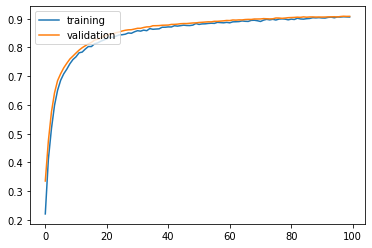

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [39]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 77us/step


In [40]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9132999777793884


## 5. Dropout (Regularization)

In [41]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    # drop out 하는 것을 20%비율 20%는 w를 0으로 만들어 끊어버리는 것과 같은 효과를 낸다.
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [42]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

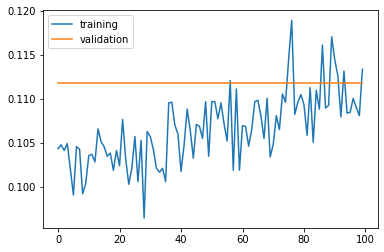

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [44]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/step


In [45]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [58]:
# 원핫인코딩 용도로 armax를 사용
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [59]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


argmax 개념

In [60]:
print(np.max([1, 2, 3, 4, 1, 8, 2.4]))
#argument로 찾는다.
print(np.argmax([1, 2, 3, 4, 1, 8, 2.4]))

label = [0,0,2,1]
x = [[1,0,0], [1,0,0], [0,0,1], [0,1,0]]
print(np.argmax(x))
print(np.argmax(x, axis=1)) # 칼럼으로 보기에 0,0,2,1이 나오게 된다.
print(np.argmax(x, axis=0)) 

print(np.argmax([0,0,0,0,1,0])) # 최대값의 인덱스를 찾느다. 해당 레이블을 찾는다.

x = np.array([0.21, 0.4, 0.9])
print(np.argmax(x))

8.0
5
0
[0 0 2 1]
[0 3 2]
4
2


In [61]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [62]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [63]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')
# hard 방식은 voting 수만 따지는 것
# soft 방식은 가중치를 따로 주어서 voting!

#### 학습을 네번해야하기에 오래걸린다.soft는 투표까지 한번 더 하기 때문

In [64]:
ensemble_clf.fit(X_train, y_train)

Train on 19800 samples
Epoch 1/100
19800/19800 [==============================] - 1s 62us/sample - loss: 2.3890 - accuracy: 0.1008
Epoch 2/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.3145 - accuracy: 0.0956
Epoch 3/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.3028 - accuracy: 0.1001
Epoch 4/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.3009 - accuracy: 0.1136
Epoch 5/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.3004 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.3001 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 46us/sample - loss: 2.2998 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 46us/sample - loss: 2.2996 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2993 - accuracy: 0.1135
Epoch

19800/19800 [==============================] - 1s 45us/sample - loss: 2.2848 - accuracy: 0.1135
Epoch 51/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2843 - accuracy: 0.1135
Epoch 52/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2838 - accuracy: 0.1135
Epoch 53/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2833 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2828 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2823 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 44us/sample - loss: 2.2818 - accuracy: 0.1135
Epoch 57/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2812 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 45us/sample - loss: 2.2807 - accuracy: 0.1135
Epoch 59/100
19800/19800 [======

19800/19800 [==============================] - 1s 44us/sample - loss: 2.2224 - accuracy: 0.2630


VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000205B5F0A948>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000205B5F0A808>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000205B5F00DC8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [65]:
y_pred = ensemble_clf.predict(X_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [66]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.2821


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [28]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [29]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

#model1 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
#model2 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
model1 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [30]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [33]:
ensemble_clf.fit(X_train, y_train)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Acc: ', accuracy_score(y_pred, y_test))